# EX 1 Object Localization

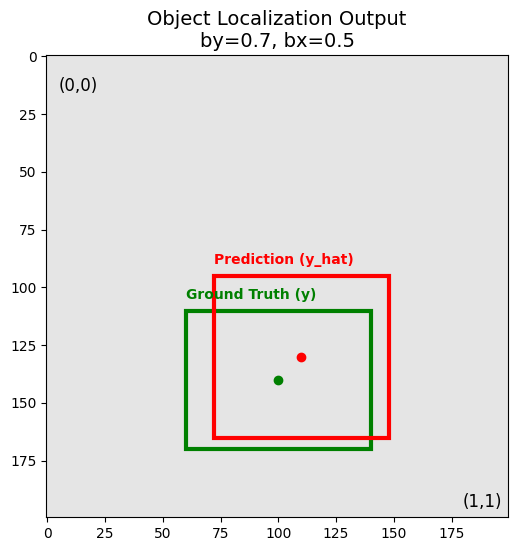

In [1]:
### Full Visualization Implementation
'''
This visualization draws a **Bounding Box** on an image based on the coordinate convention b_x, b_y, b_h, b_w)
defined in the transcript. It visually compares a "Ground Truth" box against a "Predicted" box.
'''
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def visualize_bounding_box():
    # Create a blank image (e.g., 200x200)
    img_size = 200
    img = np.ones((img_size, img_size, 3)) * 0.9 # Light gray background
    
    # --- Define Box Coordinates (Normalized 0 to 1) ---
    # Example from transcript: Center(0.5, 0.7), Height=0.3, Width=0.4
    true_box = [0.5, 0.7, 0.3, 0.4]  # [bx, by, bh, bw]
    pred_box = [0.55, 0.65, 0.35, 0.38] # Slightly off prediction
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(img)
    
    # Helper to convert Normalized (0-1) to Pixel Coordinates
    def draw_rect(box, color, label):
        bx, by, bh, bw = box
        
        # Calculate Top-Left Corner (x, y) for Matplotlib
        # bx is center_x, by is center_y
        # x_min = center_x - width/2
        # y_min = center_y - height/2
        w_pixel = bw * img_size
        h_pixel = bh * img_size
        x_pixel = (bx * img_size) - (w_pixel / 2)
        y_pixel = (by * img_size) - (h_pixel / 2)
        
        # Draw Rectangle
        rect = patches.Rectangle((x_pixel, y_pixel), w_pixel, h_pixel, 
                                 linewidth=3, edgecolor=color, facecolor='none')
        ax.add_patch(rect)
        
        # Draw Center Point
        ax.plot(bx * img_size, by * img_size, marker='o', color=color)
        ax.text(x_pixel, y_pixel - 5, label, color=color, fontweight='bold')

    # Draw Boxes
    draw_rect(true_box, 'green', 'Ground Truth (y)')
    draw_rect(pred_box, 'red', 'Prediction (y_hat)')
    
    # Annotation for Coordinate System
    ax.text(5, 15, "(0,0)", color='black', fontsize=12)
    ax.text(180, 195, "(1,1)", color='black', fontsize=12)
    
    ax.set_title(f"Object Localization Output\nby={true_box[1]}, bx={true_box[0]}", fontsize=14)
    plt.axis('on')
    plt.show()

visualize_bounding_box()

# EX 2 LandMarks Detection

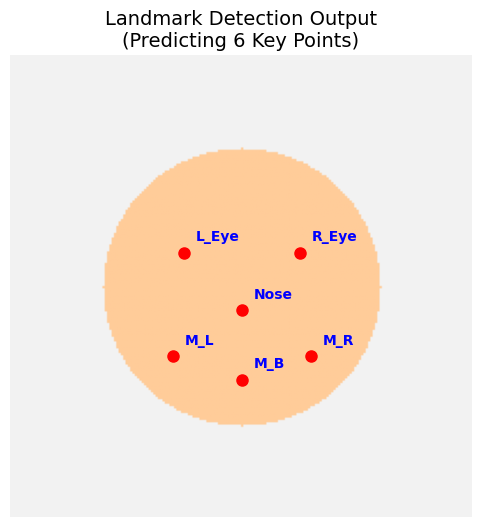

In [3]:
### Full Visualization Implementation
'''
This visualization simulates **Landmark Detection** on a face. 
It draws localized points (simulating eye corners and mouth) on an image to show what the network output looks like.
'''
import matplotlib.pyplot as plt
import numpy as np

def visualize_landmarks():
    # Create a blank image
    img_size = 200
    img = np.ones((img_size, img_size, 3)) * 0.95 # Off-white background
    
    # Draw a "Face" (Circle)
    center = (100, 100)
    radius = 60
    y, x = np.ogrid[:img_size, :img_size]
    mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2
    img[mask] = [1.0, 0.8, 0.6] # Skin tone approximation
    
    # --- Define Landmarks (Ground Truth / Prediction) ---
    # Format: [(x, y), label]
    landmarks = [
        ((75, 85), "L_Eye"),   # Left Eye
        ((125, 85), "R_Eye"),  # Right Eye
        ((100, 110), "Nose"),  # Nose
        ((70, 130), "M_L"),    # Mouth Left
        ((130, 130), "M_R"),   # Mouth Right
        ((100, 140), "M_B")    # Mouth Bottom
    ]
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(img)
    
    # Plot Landmarks
    for (lx, ly), label in landmarks:
        # Plot point
        ax.plot(lx, ly, marker='o', color='red', markersize=8)
        # Plot label
        ax.text(lx + 5, ly - 5, label, color='blue', fontsize=10, fontweight='bold')

    ax.set_title("Landmark Detection Output\n(Predicting 6 Key Points)", fontsize=14)
    ax.axis('off')
    plt.show()

visualize_landmarks()